## Binning (putting items into buckets)

In [1]:
# Import Dependencies
import pandas as pd

In [15]:
# Create a DataFrame from dictionary of lists. 
class_data = {
    'Class': ['Oct', 'Oct', 'Jan', 'Jan', 'Oct', 'Jan'], 
    'Name': ["Cyndy", "Logan", "Laci", "Elmer", "Crystle", "Emmie"], 
    'Test Score': [90, 59, 72, 88, 98, 60]}

test_scores_df = pd.DataFrame(class_data)
test_scores_df

,Class,Name,Test Score
0,Oct,Cyndy,90
1,Oct,Logan,59
2,Jan,Laci,72
3,Jan,Elmer,88
4,Oct,Crystle,98
5,Jan,Emmie,60


In [3]:
# Create the bins in which Data will be held
# Bins are 0, 59.9, 69.9, 79.9, 89.9, 100.   
bins = [0, 59.9, 69.9, 79.9, 89.9, 100]

# Create the names for the five bins
group_names = ["F", "D", "C", "B", "A"]

- A ```> 89.9 <= 100```
- B ```> 79.9 <= 89.9```
- C ```> 69.9 <= 79.9```
- D ```> 59.9 <= 69.9```
- F ```> 0 <= 59.9```

In [6]:
# #pd.cut(test_scores_df["Test Score"], 
#                                               bins, labels=group_names, 
#                                               include_lowest=True)

In [7]:
# Slice the data and place it into bins
test_scores_df["Test Score Summary"] = pd.cut(test_scores_df["Test Score"], 
                                              bins, labels=group_names, 
                                              include_lowest=True)
test_scores_df


,Class,Name,Test Score,Test Score Summary
0,Oct,Cyndy,90,A
1,Oct,Logan,59,F
2,Jan,Laci,72,C
3,Jan,Elmer,88,B
4,Oct,Crystle,98,A
5,Jan,Emmie,60,D


In [21]:
l = []
for index, row in test_scores_df.iterrows():
    l.append((row[0], row[1]))
l

[('Oct', 'Cyndy'),
 ('Oct', 'Logan'),
 ('Jan', 'Laci'),
 ('Jan', 'Elmer'),
 ('Oct', 'Crystle'),
 ('Jan', 'Emmie')]

In [22]:
my_results = ""
for element in l:
    my_results += f"{element[0]}, {element[1]}\n"

In [24]:
print(my_results)

Oct, Cyndy
Oct, Logan
Jan, Laci
Jan, Elmer
Oct, Crystle
Jan, Emmie



In [8]:
test_scores_df["Test Score Summary"].value_counts()

Test Score Summary
A    2
F    1
D    1
C    1
B    1
Name: count, dtype: int64

In [9]:
test_scores_df["Test Score Summary"].value_counts(normalize=True)

Test Score Summary
A    0.333333
F    0.166667
D    0.166667
C    0.166667
B    0.166667
Name: proportion, dtype: float64

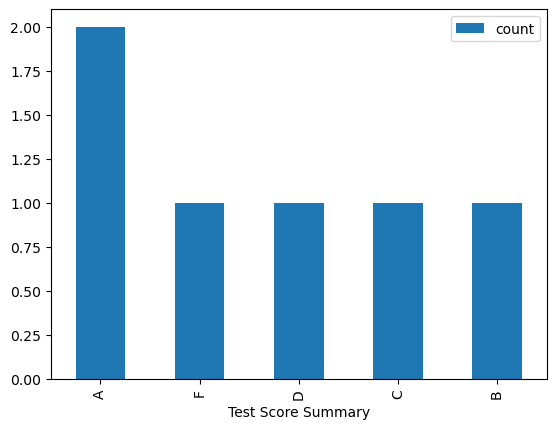

In [10]:
# Sneak peak - Graph!
ax = test_scores_df["Test Score Summary"].value_counts().to_frame().plot.bar()

In [11]:
# Creating a group based off of the bins
test_scores_df = test_scores_df.groupby("Test Score Summary")
test_scores_df.max()

,Class,Name,Test Score
Test Score Summary,,,
F,Oct,Logan,59
D,Jan,Emmie,60
C,Jan,Laci,72
B,Jan,Elmer,88
A,Oct,Cyndy,98
